## Skillcraft Task-4

In [14]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('US_Accidents_March23.csv')

C:\Users\Asus\AppData\Local\Temp\ipykernel_1324\3879011195.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('US_Accidents_March23.csv')


In [16]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643293 entries, 0 to 1643292
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1643293 non-null  object 
 1   Source                 1643293 non-null  object 
 2   Severity               1643293 non-null  int64  
 3   Start_Time             1643293 non-null  object 
 4   End_Time               1643293 non-null  object 
 5   Start_Lat              1643293 non-null  float64
 6   Start_Lng              1643293 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1643293 non-null  float64
 10  Description            1643289 non-null  object 
 11  Street                 1641580 non-null  object 
 12  City                   1643253 non-null  object 
 13  County                 1643292 non-null  object 
 14  State             

### Analyze Road Conditions & Accidents

In [18]:
print(df.columns.tolist())

['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


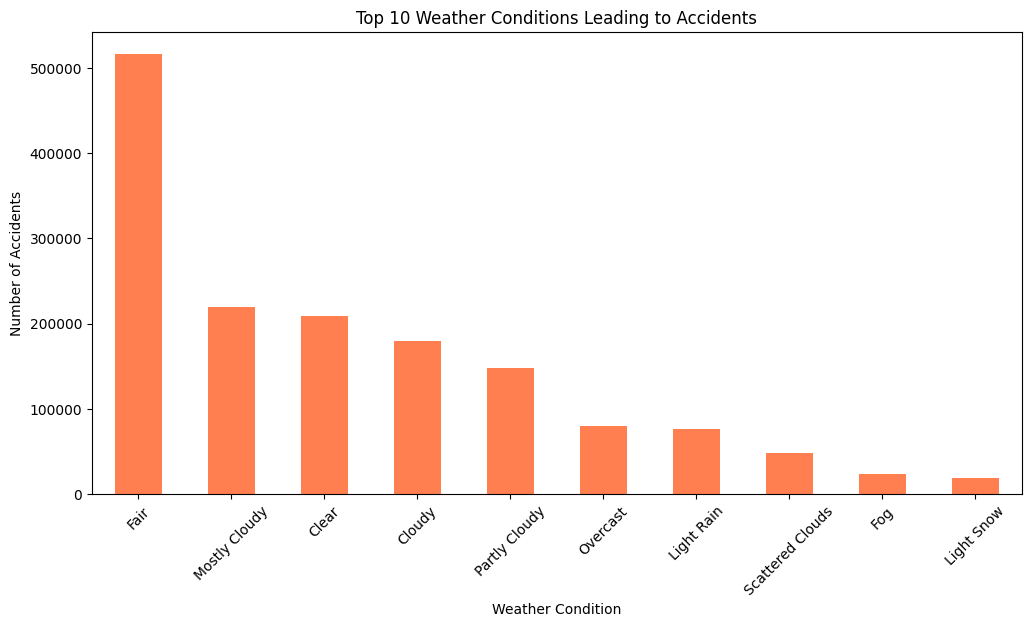

In [19]:
road_conditions=df.groupby('Weather_Condition')['ID'].count().sort_values(ascending=False)
plt.figure(figsize=(12,6))
road_conditions[:10].plot(kind='bar', color='coral')
plt.title("Top 10 Weather Conditions Leading to Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

### Analyze Weather Conditions & Accidents

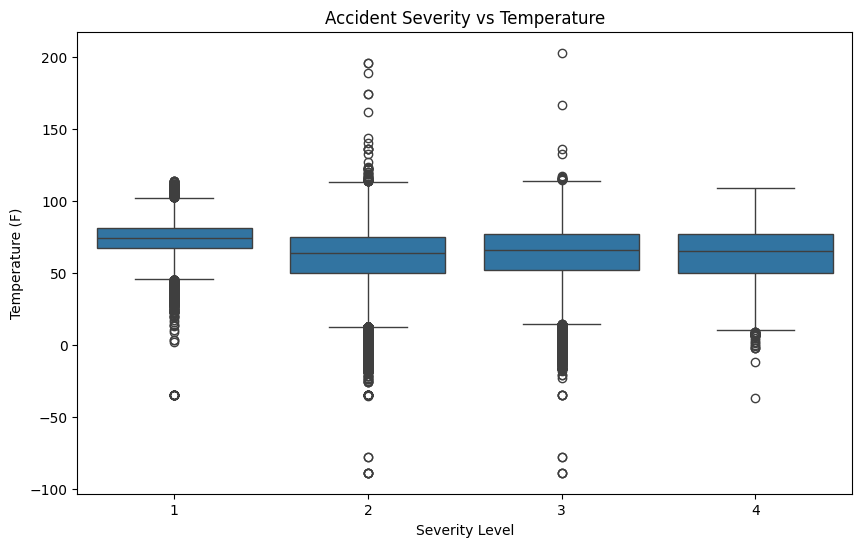

In [22]:
# Analyze accident severity based on weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title("Accident Severity vs Temperature")
plt.xlabel("Severity Level")
plt.ylabel("Temperature (F)")
plt.show()



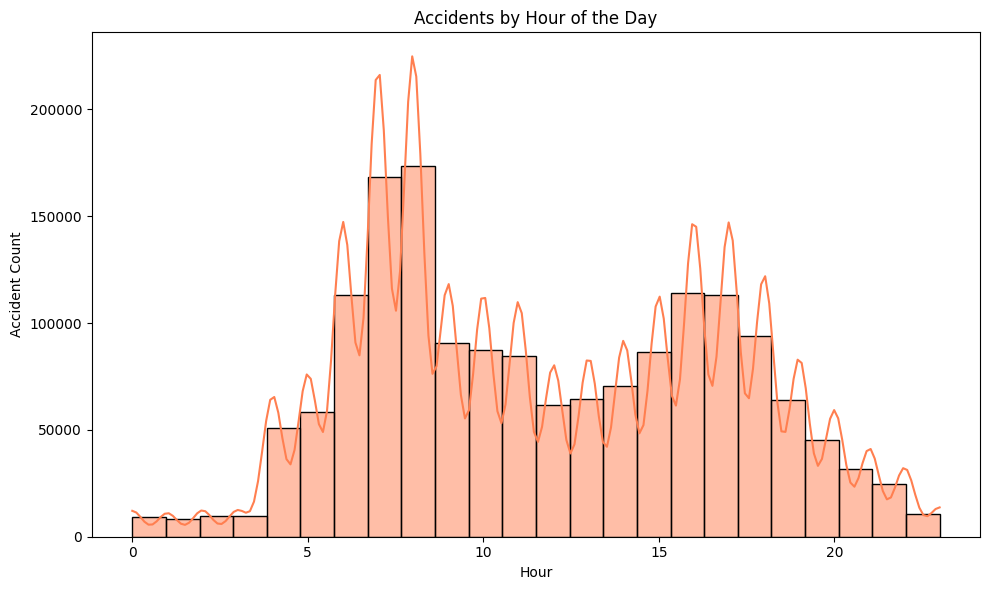

In [23]:
# analyze accidents by hour
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'], bins=24, kde=True, color='coral')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()



C:\Users\Asus\AppData\Local\Temp\ipykernel_1324\1120699947.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=top_cities.values, y=top_cities.index, palette='viridis')


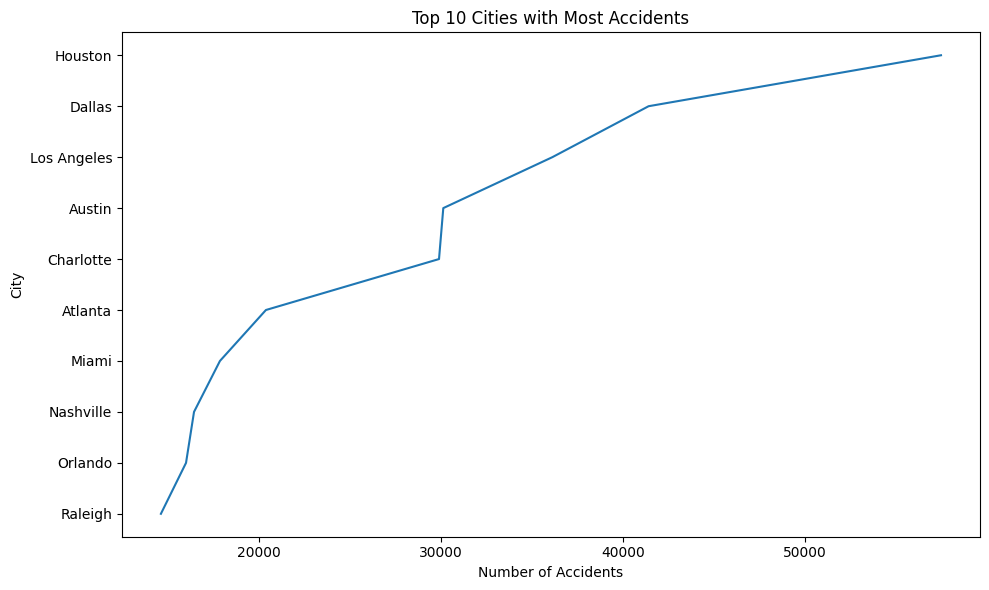

In [28]:
# top cities with most accident
top_cities = df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.lineplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities with Most Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.tight_layout()
plt.show()


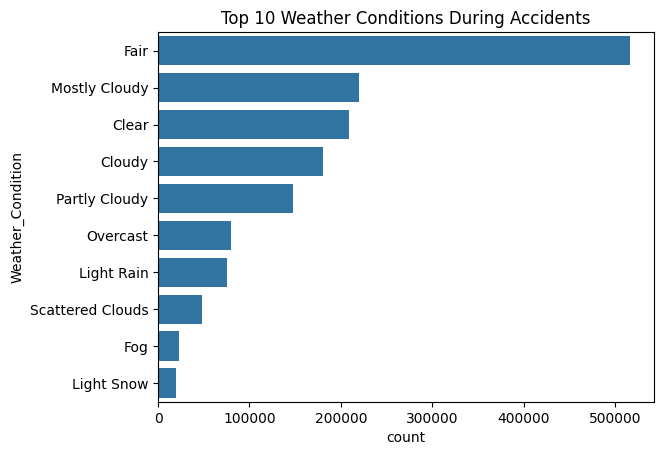

In [29]:
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().head(10).index)
plt.title('Top 10 Weather Conditions During Accidents')
plt.show()
